In [93]:
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from IPython.display import Image
import pandas as pd
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
import seaborn as sns
%matplotlib inline

In [27]:
STIM_PATH = Path('/media/neuroscout-data/neuroscout/file_data/stimuli/')

In [3]:
api = Neuroscout()

In [64]:
dataset_tasks =  {'HealthyBrainNetwork-movieDM': (8, 7),
 'SchematicNarrative-perception': (20, 40),
 'studyforrest-movie': (11, 16),
 'Raiders-raiders': (10, 9),
 'Life-life': (9, 8),
 'ParanoiaStory-story': (18, 38),
 'Sherlock-sherlockPart1': (21, 41),
 'SherlockMerlin-MerlinMovie': (5, 4),
 'LearningTemporalStructure-movie': (19, 39)}

In [22]:
def get_stimuli_values(predictor_name, dataset_id, task_id=None):
    runs = [r['id'] for r in api.runs.get(dataset_id=dataset_id, task_id=task_id)]
    preds = api.predictors.get(name=predictor_name, run_id=runs)
    if preds:
        predictor_id = preds[0]['id']
    else:
        return None

    pes = pd.DataFrame(api.predictor_events.get(predictor_id=predictor_id, stimulus_timing=True))
    stimuli_by_value = pes.groupby('stimulus_path').max().reset_index()
    
    return stimuli_by_value

In [23]:
def _load_impath(rel_path, dims=None):
    img = mpimg.imread(str(STIM_PATH / rel_path))
    
    if resize:
        img = resize(img, dims)
        
    return img

In [24]:
def bin_sv_min_max(sv, bin_length=60):
    sv['time_group'] = (sv.onset / bin_length).round()
    sv_binned_max = sv.groupby('time_group').apply(lambda x: x[x.value == x.value.max()]).sort_values('value')
    sv_binned_min = sv.groupby('time_group').apply(lambda x: x[x.value == x.value.min()]).sort_values('value')
    
    return sv_binned_min, sv_binned_max

In [398]:
sv = get_stimuli_values('building', 5, 4)
sv['onset'] = sv['onset'] - 25.5
sv['value'] = sv.value.astype('float')
sv_min, sv_max = bin_sv_min_max(sv, bin_length=60)

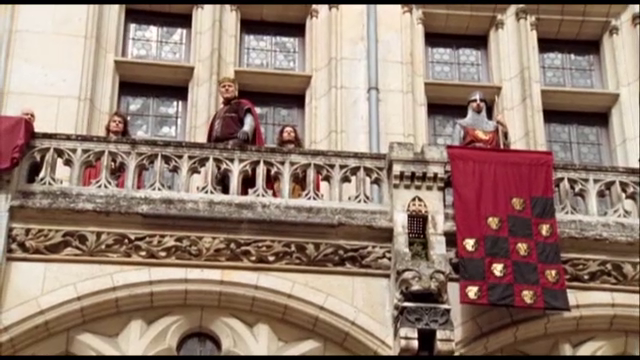

In [84]:
Image(str(STIM_PATH / top_ps[0]))

### Plot regressors for MerlinMovie

In [123]:
import seaborn as sns

In [252]:
regressors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool', 'subtlexusfrequency_Lg10WF',
              'people']

In [543]:
sampling_rate = 6
transformations = [
    {
        'Input' : 'subtlexusfrequency_Lg10WF',
        'Name': 'Scale',
        'Demean': True,
        "Rescale": True,
        "ReplaceNA": "after",
    },
    {
        'Input': regressors,
        'Name': 'ToDense',
        'SamplingRate': sampling_rate
        
    }
]

In [544]:
example =  api.analyses.create_analysis(
    name='overview_merlin_example', 
    dataset_name="SherlockMerlin", 
    subjects='23',
    predictor_names=regressors,
    tasks="MerlinMovie",
    transformations=transformations,
    dummy_contrasts=regressors) 

In [545]:
example.generate_report(run_id=example.runs[0], sampling_rate=sampling_rate)

{'generated_at': '2021-11-15T23:3',
 'result': None,
 'sampling_rate': 6.0,
 'scale': False,
 'status': 'PENDING',
 'traceback': None,
 'warnings': []}

In [546]:
df = pd.read_csv(example.get_design_matrix()[0])
df['time'] = (df.index / sampling_rate) - 25.5

In [547]:
select = ['brightness', 'building', 'landscape', 'any_faces',   'rms', 'speech', 'subtlexusfrequency_Lg10WF']

df_melt = pd.melt(df[select + ['time']], id_vars='time', var_name='predictor')

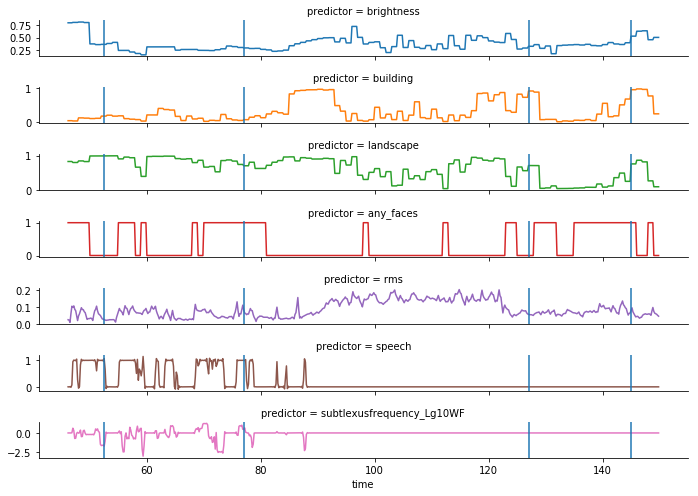

In [548]:
g = sns.relplot(
    data=df_melt[(df_melt.time < 150) & (df_melt.time > 46)],
    x="time", y="value",
    row="predictor",
    hue='predictor',
    kind="line",
    height=1, aspect=10, facet_kws=dict(sharey=False),
    legend=None
)
g.set(ylabel='')
for ax in g.axes.flat:
    ax.axvline(52.5)
    ax.axvline(77)
    ax.axvline(127)
    ax.axvline(145)

In [536]:
"no young man no matter how great can know his DESTINY"

12.5

In [ ]:
"a boy THAT WILL in time father a legend"'

In [539]:
77 - 41

36

In [483]:
sv.sort_values('onset')

,stimulus_path,duration,onset,predictor_id,run_id,stimulus_duration,stimulus_id,stimulus_onset,value,time_group
1175,c137fdde7c5571f0f36411886ed36f99e0085b24.png,1.0,0.0,364,1410,1.0,2716,25.5,0.666941,0.0
455,4b6e0507dbe1b60ef461ad6421e7d0511bd2cdbf.png,1.0,1.0,364,1410,1.0,2717,26.5,0.593619,0.0
1299,da537726bf660c76ee55086bb6e2339bafaafef4.png,1.0,2.0,364,1410,1.0,2718,27.5,0.616597,0.0
32,06af4b03fe895fcba390c53c0a0e19c6592e4241.png,1.0,3.0,364,1410,1.0,2719,28.5,0.687179,0.0
676,6f485b4229b4c3f93ed5d05806139a9b20810a40.png,1.0,4.0,364,1410,1.0,2720,29.5,0.662546,0.0
1423,eea42eb3a508fadfb6181900fbe5ea1ed08bb6d0.png,1.0,5.0,364,1410,1.0,2721,30.5,0.557713,0.0
726,783c810ccc6e8fa61e04d3c88d891df6fd8cc346.png,1.0,6.0,364,1410,1.0,2722,31.5,0.634054,0.0
1170,c03b6ddc9a65d044d66e43daa3a279f90da3e35e.png,1.0,7.0,364,1410,1.0,2723,32.5,0.711804,0.0
1208,c85719c1f995daa9150e7607e3bd11d13f097317.png,1.0,8.0,364,1410,1.0,2724,33.5,0.665671,0.0
358,3dd4d2f9c72daa023b063609199b2b9a080d96aa.png,1.0,9.0,364,1410,1.0,2725,34.5,0.651961,0.0


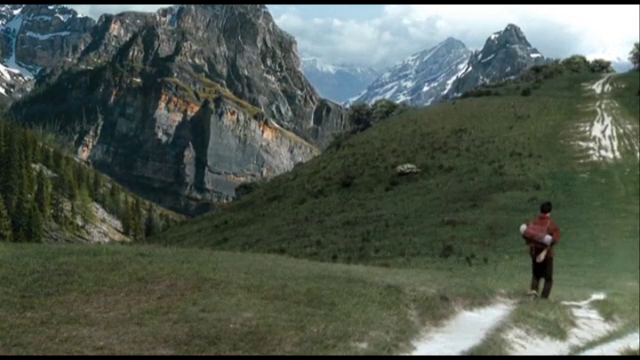

In [452]:
Image(str(STIM_PATH / str(sv[sv.onset == 52].stimulus_path.values[0])))

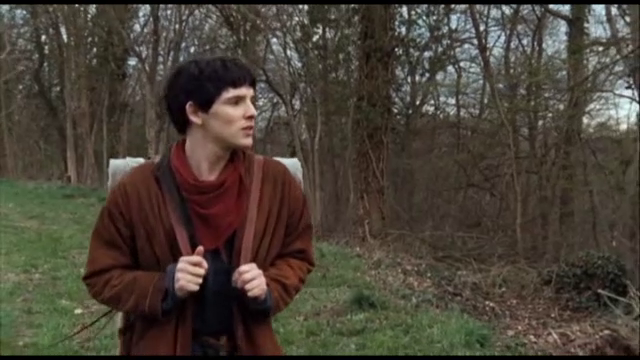

In [475]:
Image(str(STIM_PATH / str(sv[sv.onset == 77].stimulus_path.values[0])))

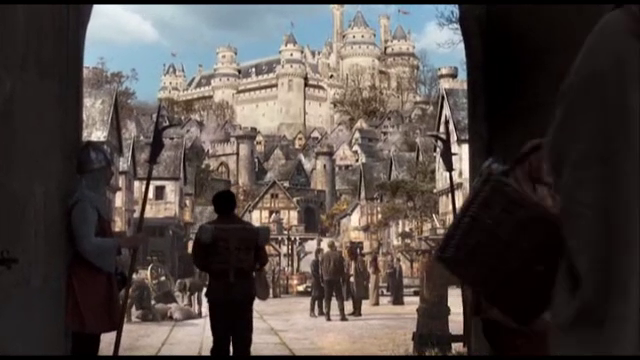

In [393]:
Image(str(STIM_PATH / str(sv[sv.onset == 127].stimulus_path.values[0])))

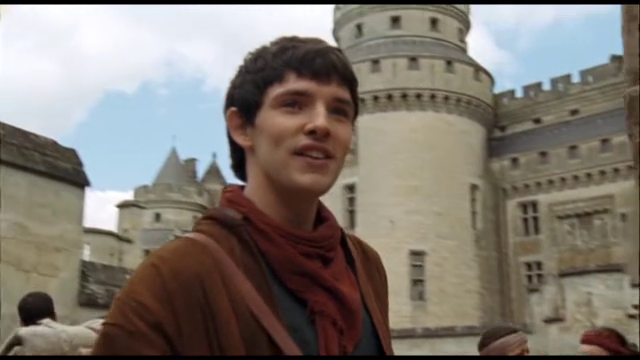

In [392]:
Image(str(STIM_PATH / str(sv[sv.onset == 145].stimulus_path.values[0])))